In [3]:
from trajectories import *
from models import *
from plotting import *

Trajectory is (1, 2, 251)
Measured is (1, 2, 251)
ys torch.Size([251, 1, 2])
embeds torch.Size([251, 1, 128])
output torch.Size([251, 1, 128])
prediction torch.Size([251, 1, 2])
Recovered has shape torch.Size([251, 1, 2])
When plotting
Trajectory shape (251, 2)
Measured shape (251, 2)
Recovered shape torch.Size([2, 1])


ValueError: x and y must have same first dimension, but have shapes (2,) and (251,)

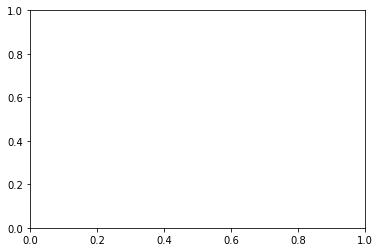

In [14]:
A, C, Q, R, S, x0, state_dim, obs_dim = so2_params()
rng = np.random.default_rng()

N = 1
T = 250

traj, meas = generate_traj(N, T, A, C, Q, R, S, x0, rng)

state_dim = A.shape[0]

print("Trajectory is", traj.shape)
print("Measured is", meas.shape)

model = GPTModel(n_dims_token=state_dim, n_positions=N, n_embd=128, n_layer=6, n_head=4)
# meas has shape (num_traj, state_dim, seq_len)
# We want the input to have shape (seq_len, num_traj, state_dim)
recv = model( torch.tensor(meas, dtype=torch.float32).permute((2, 0, 1)) )

print("Recovered has shape", recv.shape)
print('When plotting')
plot({"Trajectory":traj[0].T, "Measured":meas[0].T, "Recovered":recv[0].T})